<a href="https://colab.research.google.com/github/smasterparth/Colab-Project/blob/master/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anujvyas/IPL-First-Innings-Score-Prediction-Deployment/master/ipl.csv')

In [ ]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
df.shape

(76014, 15)

In [ ]:
df.isnull().values.any()

False

In [ ]:
columns_to_remove = ['mid' , 'venue' , 'batsman' , 'bowler', 'striker','non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
df['bat_team'].nunique()

14

In [ ]:
list(df['bat_team'].unique())

['Kolkata Knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Deccan Chargers',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Delhi Daredevils',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Sunrisers Hyderabad',
 'Rising Pune Supergiants',
 'Gujarat Lions',
 'Rising Pune Supergiant']

In [ ]:
consistent_teams = ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore','Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
df.shape

(53811, 9)

In [ ]:
df['bat_team'].nunique()

8

In [ ]:
df['bowl_team'].nunique()

8

In [ ]:
df['total'].max()

246

In [ ]:
df['total'].min()

67

In [ ]:
df['runs_last_5'].max()

94

In [ ]:
df['runs_last_5'].min()

0

In [ ]:
df.isnull().values.any()

False

In [ ]:
df= df[df['overs']>=5.0]

In [ ]:
df.shape

(40108, 9)

In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [ ]:
df.dtypes

date               object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
dtype: object

In [ ]:
from datetime import datetime

In [ ]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [ ]:
#Converting categorical features into Numerical features using OneHotEncoding 

In [ ]:
df_encoded = pd.get_dummies(data = df, columns = ['bat_team', 'bowl_team'])

In [ ]:
df_encoded.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_encoded.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [ ]:
df_encoded = df_encoded[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils','bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders','bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals','bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad','bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils','bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders','bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals','bowl_team_Royal Challengers Bangalore','bowl_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','total']]

In [ ]:
df_encoded.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,61,1,5.5,58,1,222


In [ ]:
X_train = df_encoded.drop('total' , axis = 1)[df_encoded['date'].dt.year <= 2016]

In [ ]:
X_test = df_encoded.drop('total', axis=1)[df_encoded['date'].dt.year >= 2017]

In [ ]:
y_train = df_encoded[df_encoded['date'].dt.year <= 2016]['total']

In [ ]:
y_test = df_encoded[df_encoded['date'].dt.year >= 2017]['total']

In [ ]:
X_train.tail()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
68857,2016-05-29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,194,7,19.2,54,4
68858,2016-05-29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,200,7,19.3,56,4
68859,2016-05-29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,201,7,19.4,56,4
68860,2016-05-29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,202,7,19.5,57,4
68861,2016-05-29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,208,7,19.6,62,4


In [ ]:
y_train.tail()

68857    208
68858    208
68859    208
68860    208
68861    208
Name: total, dtype: int64

In [ ]:
X_train.drop('date',axis=1,inplace=True)

In [ ]:
X_test.drop('date',axis=1,inplace=True)

# Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_1 = LinearRegression()

In [ ]:
model_1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import pickle

In [ ]:
filename = 'first-innings-score-lr-model.pkl'

In [ ]:
pickle.dump(model_1, open(filename,'wb'))

In [ ]:
pred_1 = model_1.predict(X_test)

In [ ]:
print(model_1.score(X_train,y_train))

0.6502133812161469


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [ ]:
grid = GridSearchCV(estimator=Ridge(), param_grid=params, scoring='neg_mean_squared_error' , cv=5)

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.61566e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41749e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.45442e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40095e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.62242e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(grid.best_estimator_)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
print(grid.best_params_)

{'alpha': 40}


In [ ]:
print(grid.best_index_)

11


In [ ]:
print(grid.best_score_)

-328.41527924879244


In [ ]:
# 10^-15 = 1e-15

In [ ]:
#GridSearchCV is a Hyperparameter tuning technique


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random = RandomizedSearchCV(estimator=Ridge(), param_distributions=params, cv=5)

In [ ]:
random.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41749e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.45442e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40095e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.62242e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.57111e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(random.best_estimator_)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
print(random.best_score_)

0.6139794729368739


In [ ]:
pred_2 = grid.predict(X_test)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


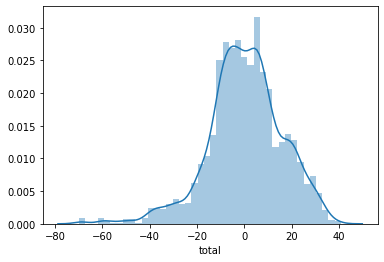

In [ ]:
sns.distplot(y_test - pred_2)

In [ ]:
from sklearn import metrics

In [ ]:
print('MSE: ' , metrics.mean_squared_error(y_test,pred_2))
print('MAE: ' , metrics.mean_absolute_error(y_test,pred_2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,pred_2)))

MSE:  251.03172964112716
MAE:  12.117294527005024
RMSE:  15.843980864704651


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_3 = Lasso()

In [ ]:
grid_lasso = GridSearchCV(estimator=Lasso(), param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_lasso.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4538752.411627855, tolerance: 2529.9556965945594
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4480012.438691147, tolerance: 2547.038071028663
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4636937.876042261, tolerance: 2667.8126904366486
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4373381.39

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(grid_lasso.best_estimator_)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [ ]:
print(grid_lasso.best_score_)

-320.8221491835716


In [ ]:
pred_lasso = grid_lasso.predict(X_test)

In [ ]:
print('MSE: ' , metrics.mean_squared_error(y_test,pred_lasso))
print('MAE: ' , metrics.mean_absolute_error(y_test,pred_lasso))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)))

MSE:  262.3653827960697
MAE:  12.213583996827493
RMSE:  16.197696836157593


In [ ]:
# lasso works bitslower than Ridge Regression

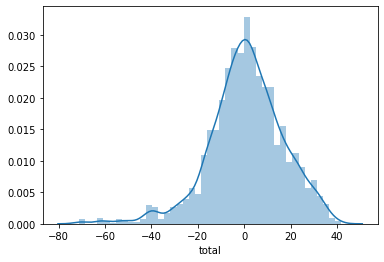

In [ ]:
sns.distplot(y_test - pred_lasso)